## 参考

* https://www.slideshare.net/KenjiUrai/explanation-of-gpr
    * 式の展開
    * カーネルを使う

In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

In [68]:
# data,target= load_iris().data,load_iris().target
# print(data.shape, target.shape)
# plt.subplot(121)
# plt.scatter(data[:,0], target)
# plt.subplot(122)
# plt.scatter(data[:,1], target)
num = 100
data = np.array([np.linspace(0,2*np.pi,num),np.linspace(0,2*np.pi,num)]).T
target = np.sin(data[:,0])+np.cos(data[:,1])+np.random.rand(len(data))

In [69]:
sample = random.sample(range(len(data)),k=len(data))

sample_num = 100
X = data[sample[:sample_num],0:2].T.reshape(2,-1)
y = target[sample[:sample_num]].reshape(-1,1)

sg = 0.1
D,N = X.shape
S = np.array([[10,1],[0.1,0.01]])

#X-X_h
print(X.shape, y.shape)

(2, 100) (100, 1)


In [58]:
def inv(X):
    return np.linalg.inv(X)

def norm(x):
    return np.linalg.norm(x)

def kernel(x, y, a=1, b=0.1):
    return a*np.exp(-b*0.5*norm(x-y)**2)

def K(X):
    N = X.shape[1]
    KM = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            KM[i,j] = kernel(X[:,i],X[:,j]) 
    return KM

def k(X_h, X):
    N_h, N = X_h.shape[1], X.shape[1]
    kM = np.zeros((N,N_h))
    for i in range(N):
        for j in range(N_h):
            kM[i,j] = kernel(X_h[:,j], X[:,i]) 
    return kM

def k_(X):
    N = X.shape[1]
    kv = np.zeros((N,1))
    for i in range(N):
        kv[i,0] = kernel(X[:,i], X[:,i])
    return kv

In [39]:
np.diag(k_M.T.dot(C_M).dot(k_M)).ravel().shape
k_V.shape 

(100, 1)

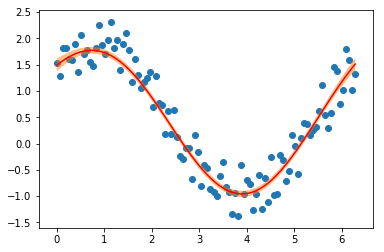

In [70]:
X_h = np.array([np.linspace(0,2*np.pi,num),np.linspace(0,2*np.pi,num)])
y_true = np.sin(X_h[0,:])+np.cos(X_h[1,:])+np.random.rand(X_h.shape[1])

C_M = inv(K(X)+sg*np.eye(N,N))
k_M = k(X_h, X)
k_V = k_(X_h)

yh_mean = k_M.T.dot(C_M).dot(y)

yh_var = k_V - np.diag(k_M.T.dot(C_M).dot(k_M)).reshape(-1,1)
yh_std = np.sqrt(yh_var)

plt.plot(X_h[0,:],yh_mean,c="red")
plt.scatter(X_h[0,:], y_true)

#yh_mean+yh_var
plt.fill_between(X_h[0,:], (yh_mean-yh_std).reshape(-1,), (yh_mean+yh_std).reshape(-1,), alpha=0.5)

#yh_var